## This part is a complete mess idk import what you need lol

In [425]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,classification_report,f1_score,roc_auc_score
import tensorflow as tf
from tensorflow import keras
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import matplotlib.ticker as ticker
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from scipy.stats import norm
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier,plot_tree

from sklearn.model_selection import train_test_split,GridSearchCV
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score
import matplotlib.pyplot as pl


## Data

In [426]:
# set random seed
random_seed = 42

In [447]:
df3=pd.read_excel('ModelingDataset-LastYear-NoNormalization.xlsx')

In [428]:
df=pd.read_excel('ModelingDataset.xlsx')
# separate features and target variable
X = df.drop('employee_status', axis=1)
y = df['employee_status']

df['compa_ratio'] = df3['compa_ratio']

# split data into train and test sets, stratifying by the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed, stratify=y)

# check the ratio of binary variable in train and test set
print("Ratio of binary variable in train set: ", y_train.sum() / len(y_train))
print("Ratio of binary variable in test set: ", y_test.sum() / len(y_test))

Ratio of binary variable in train set:  0.27165354330708663
Ratio of binary variable in test set:  0.2716089880268985


In [429]:
df2=pd.read_excel('ModelingDataset-LastYear.xlsx')
#Don't know what I did with the data but this exists
df2 = df2.drop(columns=['Unnamed: 0'])
print(df2.shape)

df2['compa_ratio'] = df3['compa_ratio']

# separate features and target variable
X2 = df2.drop('employee_status', axis=1)
y2 = df2['employee_status']

# split data into train and test sets, stratifying by the target variable
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=random_seed, stratify=y2)

(15770, 73)


In [430]:

df2['compa_ratio'] = df3['compa_ratio']

# separate features and target variable
X2 = df2.drop('employee_status', axis=1)
y2 = df2['employee_status']

# split data into train and test sets, stratifying by the target variable
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=random_seed, stratify=y2)

## Insert your model training

In [431]:
# Define the XGBoost classifier with early stopping
xgb_clf = xgb.XGBClassifier(n_estimators=1000, early_stopping_rounds=10, eval_metric='error')

# Train the XGBoost classifier with early stopping
xgb_clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# Predict the target variable for the testing set
y_pred = xgb_clf.predict(X_test)

[0]	validation_0-error:0.18255
[1]	validation_0-error:0.16877
[2]	validation_0-error:0.16500
[3]	validation_0-error:0.16008
[4]	validation_0-error:0.15827
[5]	validation_0-error:0.15417
[6]	validation_0-error:0.14958
[7]	validation_0-error:0.14417
[8]	validation_0-error:0.14138
[9]	validation_0-error:0.13826
[10]	validation_0-error:0.13498
[11]	validation_0-error:0.13023
[12]	validation_0-error:0.12777
[13]	validation_0-error:0.12695
[14]	validation_0-error:0.12695
[15]	validation_0-error:0.12596
[16]	validation_0-error:0.12580
[17]	validation_0-error:0.12596
[18]	validation_0-error:0.12564
[19]	validation_0-error:0.12613
[20]	validation_0-error:0.12416
[21]	validation_0-error:0.12301
[22]	validation_0-error:0.12334
[23]	validation_0-error:0.12121
[24]	validation_0-error:0.12104
[25]	validation_0-error:0.12104
[26]	validation_0-error:0.12022
[27]	validation_0-error:0.12006
[28]	validation_0-error:0.12022
[29]	validation_0-error:0.11940
[30]	validation_0-error:0.11940
[31]	validation_0-

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(24,24,24), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train, y_train.ravel())
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

y_pred = mlp.predict(X_test)

## Make sure your model name is clf

In [432]:
clf = xgb_clf#your model fit name
#clf = mlp

In [433]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# display evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

print(f'Final Weighted Score for the model is {0.3*accuracy+0.2*precision+0.3*recall+0.2*specificity}')

Accuracy: 0.8901098901098901
Precision: 0.8734848484848485
Recall: 0.696256038647343
Specificity: 0.9623958567890115
Confusion matrix:
[[4274  167]
 [ 503 1153]]
Final Weighted Score for the model is 0.843085919681942


## Normalized Compa Ratio Generation

In [434]:
compaRatios = np.arange(.70,1.21,.02)
compaRatiosNormal = []
mu = df2['compa_ratio'].mean()
sigma = df2['compa_ratio'].std()
for i in compaRatios:
    compaRatiosNormal.append(norm.cdf((i- mu) / sigma))
compaRatiosAdd = np.arange(-.01,.21,.01)

In [435]:
X2.shape

(15770, 72)

In [436]:
clfPred = clf.predict(X2)

In [437]:
print(confusion_matrix(y2,clfPred))
print(classification_report(y2,clfPred))
print(clfPred.sum())

[[13633  1168]
 [  624   345]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     14801
           1       0.23      0.36      0.28       969

    accuracy                           0.89     15770
   macro avg       0.59      0.64      0.61     15770
weighted avg       0.91      0.89      0.90     15770

1513


In [448]:
df3['base_pay_mid'] = df3['salary']/df3['compa_ratio']

## Getting Numbers

In [439]:
print(compaRatiosAdd)

[-0.01  0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1
  0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2 ]


In [440]:
#Predictions with new compa ratios
predictArrays = []
for i in compaRatiosAdd:
    X3 = X2.copy()
    X3['clfPred'] = clfPred
    X3.loc[X3['clfPred']==1, 'compa_ratio'] = X3.loc[X3['clfPred']==1, 'compa_ratio']+i
    X3 = X3.drop('clfPred', axis=1)
    predictArrays.append(clf.predict(X3))
    print(confusion_matrix(y2,(clf.predict(X3))))
    
    #predictArray2 = xgb_clf.predict(X3)
    #predictArrays.append(predictArray2)
    #print(predictArray2.sum(), i)

[[13639  1162]
 [  628   341]]
[[13633  1168]
 [  624   345]]
[[13639  1162]
 [  628   341]]
[[13649  1152]
 [  631   338]]
[[13653  1148]
 [  633   336]]
[[13660  1141]
 [  633   336]]
[[13664  1137]
 [  635   334]]
[[13668  1133]
 [  637   332]]
[[13669  1132]
 [  638   331]]
[[13670  1131]
 [  639   330]]
[[13672  1129]
 [  641   328]]
[[13675  1126]
 [  642   327]]
[[13678  1123]
 [  643   326]]
[[13682  1119]
 [  644   325]]
[[13683  1118]
 [  644   325]]
[[13687  1114]
 [  645   324]]
[[13689  1112]
 [  646   323]]
[[13690  1111]
 [  647   322]]
[[13691  1110]
 [  647   322]]
[[13691  1110]
 [  646   323]]
[[13690  1111]
 [  647   322]]
[[13690  1111]
 [  647   322]]


In [449]:
#New Salary calculations with new compa ratios
salaries = []
df4 = df3.copy()
for i in range(len(compaRatiosAdd)):
    df4['compa_ratio'] = df3['compa_ratio']
    df4['clfPred'] = clfPred
    df4['clfPred2'] = predictArrays[i]
    #print(df4.loc[df4['clfPred']==1 & (df4['clfPred2'] == 0), 'compa_ratio'].count
    df4.loc[(df4['clfPred']==1) & (df4['clfPred2'] == 0), 'compa_ratio'] = df4.loc[(df4['clfPred']==1) & (df4['clfPred2'] == 0), 'compa_ratio'] + compaRatiosAdd[i]
    # = df4.loc[df4['clfPred']==1 & (df4['clfPred2'] == 0), 'compa_ratio'] + compaRatiosAdd[i]
    df4['clfPred'] = predictArrays[i]
    salaries.append(((df4['base_pay_mid'][df4['clfPred2']==0])*df4['compa_ratio']).sum())

In [450]:
#New replacement Costs
replacementCosts = []
for i in range(len(predictArrays)):
    df3['predict'] = predictArrays[i]
    replacementCosts.append(df3['replacement_cost'][df3['predict']==1].sum())
    

In [451]:
df4['clfPred']=clfPred
predictSpent = (df4['salary'][df4['clfPred']==0]).sum()+(df4['replacement_cost'][df4['clfPred']==1]).sum()



totalSpent = []
for i in range(len(compaRatiosAdd)):
    totalSpent.append(salaries[i]+replacementCosts[i])
    
moneySaved = []
for i in range(len(totalSpent)):
    moneySaved.append(predictSpent-totalSpent[i])

In [452]:
print(replacementCosts)
#print(salaries)
#print(totalSpent[0])
#print(predictSpent)
#print((df4['salary'][df4['clfPred']==0]).sum())

[89221111.51571625, 89545770.88277626, 88115377.88978875, 86495974.70395125, 85768209.87884626, 85157354.17392126, 84594682.99259624, 83822350.71287125, 83604996.88404626, 83559359.76087126, 83055092.77955875, 82599122.83485875, 81899040.98485875, 81404709.83722125, 81335333.05732125, 80565245.99952126, 80154143.82944626, 79917993.81404623, 79736415.58604625, 79821457.35017124, 79724806.17017125, 79724806.17017125]


In [453]:
df4.loc[df4['clfPred']==1 & (df4['clfPred2'] == 0), 'compa_ratio'].count()

80

In [415]:
newDF = pd.DataFrame()

In [416]:
newDF['compa_ratios'] = compaRatiosAdd
newDF['replacement_costs'] = replacementCosts
newDF['salaries'] = salaries
newDF['money_saved'] = moneySaved

In [417]:
newDF.to_excel('economic stats.xlsx')

PermissionError: [Errno 13] Permission denied: 'economic stats.xlsx'

## Data Visualization? Someone probably has better graphing skills

<Axes: title={'center': 'Impact of Compa Ratios on Total Money Saved'}, xlabel='Compa Ratios', ylabel='Money Saved in thousands'>

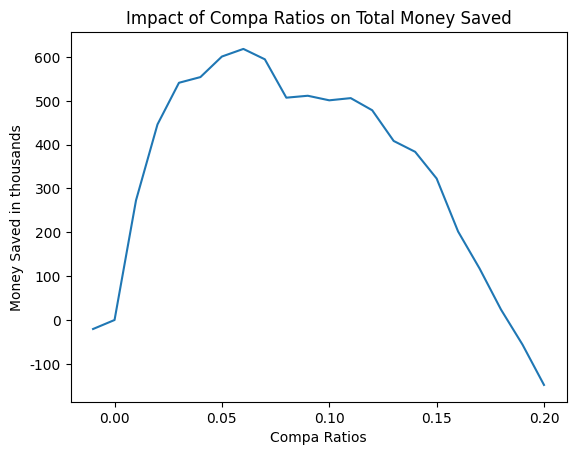

In [454]:
fig, ax=plt.subplots()
ax.plot(compaRatiosAdd,moneySaved)

ax.set_xlabel('Compa Ratios')
ax.set_ylabel('Money Saved in thousands')
ax.set_title('Impact of Compa Ratios on Total Money Saved')

scale_y = 1e3
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

ax

# So apprently paying people who want to leave more money doesn't save money